In [2]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
pd.options.display.max_columns = None # Remove pandas display column number limit

In [128]:
fulldata=pd.read_csv('defaultloan.csv',index_col=0)

In [129]:
fulldata.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [130]:
def fix_header(data):
    new_header=data.iloc[0]
    data=data[1:]
    data.columns=new_header
    data.rename(columns={'default payment next month':'DEFAULTER'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [131]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [132]:
fulldata.isnull().values.any()

False

In [133]:
fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [134]:
fulldata.EDUCATION[fulldata.EDUCATION=='0']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='5']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='6']='4'

fulldata.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [135]:
fulldata.EDUCATION.unique()

array(['2', '1', '3', '4'], dtype=object)

In [136]:
fulldata['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [137]:
fulldata.MARRIAGE[fulldata.MARRIAGE=='0']='3'
fulldata.MARRIAGE.unique()
fulldata.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [138]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries

%matplotlib inline

In [139]:
fulldata[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

ID,SEX,EDUCATION,MARRIAGE
count,30000,30000,30000
unique,2,4,3
top,2,2,2
freq,18112,14030,15964


In [141]:
def fix_header(data):
    data.rename(columns={'PAY_0':'PAY_1'},inplace=True)
    return data
fulldata=fix_header(fulldata)

In [142]:
fulldata.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTER
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [143]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

fulldata=fulldata.astype(float)

In [146]:

fil = (fulldata.PAY_1 ==-2) | (fulldata.PAY_1 ==-1) | (fulldata.PAY_1 ==0)
fulldata.loc[fil, 'PAY_1'] =0

fil = (fulldata.PAY_2 ==-2) | (fulldata.PAY_2 ==-1) | (fulldata.PAY_2 ==0)
fulldata.loc[fil, 'PAY_2'] =0

fil = (fulldata.PAY_3 ==-2) | (fulldata.PAY_3 == -1) | (fulldata.PAY_3 ==0)
fulldata.loc[fil, 'PAY_3'] =0


fil = (fulldata.PAY_4 ==-2) | (fulldata.PAY_4 ==-1) | (fulldata.PAY_4 ==0)
fulldata.loc[fil, 'PAY_4'] =0


fil = (fulldata.PAY_5 ==-2) | (fulldata.PAY_5 == -1) | (fulldata.PAY_5 ==0)
fulldata.loc[fil, 'PAY_5'] =0


fil = (fulldata.PAY_6 ==-2) | (fulldata.PAY_6== -1) | (fulldata.PAY_6 ==0)
fulldata.loc[fil, 'PAY_6'] =0




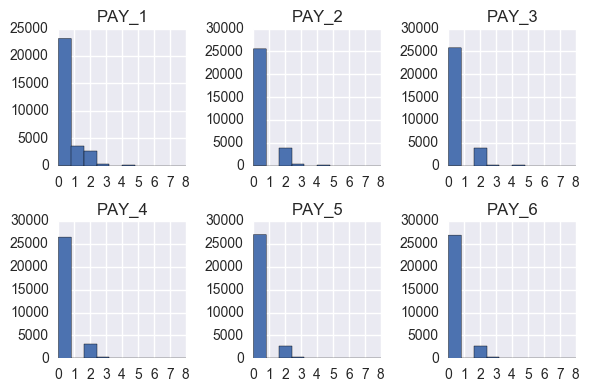

In [147]:

late = fulldata[['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

In [161]:
fulldata['out_bal_apr'] = ((fulldata['BILL_AMT5'] - (fulldata['BILL_AMT6'] - fulldata['PAY_AMT5'])))

fulldata['out_bal_may'] = (fulldata['out_bal_apr'] +(fulldata['BILL_AMT4'] - (fulldata['BILL_AMT5'] - fulldata['PAY_AMT4'])))

fulldata['out_bal_june'] = fulldata['out_bal_may']+(fulldata['BILL_AMT3'] - (fulldata['BILL_AMT4'] - fulldata['PAY_AMT3']))

fulldata['out_bal_july'] =fulldata['out_bal_june']+ (fulldata['BILL_AMT2'] - (fulldata['BILL_AMT3'] - fulldata['PAY_AMT2']))
fulldata['out_bal_aug'] =fulldata['out_bal_july']+    (fulldata['BILL_AMT1'] - (fulldata['BILL_AMT2'] - fulldata['PAY_AMT1']))


In [171]:
outstanding_apr=fulldata['out_bal_apr'].sum()
outstanding_may=fulldata['out_bal_may'].sum()
outstanding_june=fulldata['out_bal_june'].sum()
outstanding_july=fulldata['out_bal_july'].sum()
outstanding_aug=fulldata['out_bal_aug'].sum()


In [177]:
print outstanding_apr
print outstanding_june
print outstanding_aug

187170846.0
689776212.0
1163623815.0


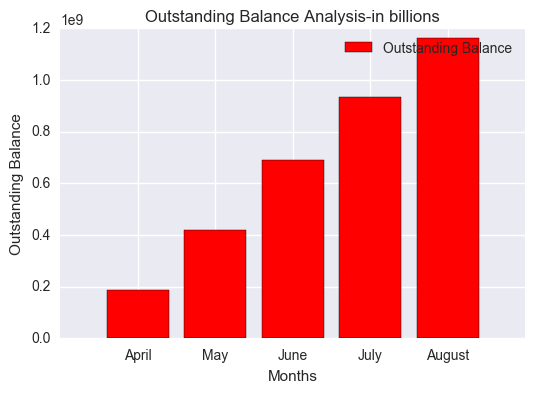

In [179]:
objects = ('April', 'May', 'June', 'July', 'August')
y_pos = np.arange(len(objects))

out_bal = [outstanding_apr,outstanding_may,outstanding_june,outstanding_july,outstanding_aug]
 
#plt.bar(y_pos-0.4,bill_amt,color='r',label="Bill Amount")
plt.bar(y_pos, out_bal,color='r',align='center', alpha=1,label="Outstanding Balance")
plt.xticks(y_pos, objects)
plt.legend()
plt.xlabel('Months')
plt.ylabel('Outstanding Balance')
plt.title('Outstanding Balance Analysis-in billions')
 
plt.show()

Aw, snap! We don't have an account for ''. Want to try again? You can authenticate with your email address or username. Sign in is not case sensitive.

Don't have an account? plot.ly

Questions? support@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.